# Implementation of Genetic Algorithm to generate recipe in Python

## Loading the Inspiring Set

We start by loading the inspiring set from a JSON string. We'll also load some helpful libraries.

In [1]:
import json
import pprint
import random
import math
import matplotlib.pyplot as plt

with open('dessert_and_cookie_recipes.json', 'r') as file:
    data = json.load(file)
    
recipes = data['recipes']
# recipes = json.loads(data)['recipes']

To check what we have loaded we can use the pretty printing library (pprint).

In [2]:
pprint.PrettyPrinter().pprint(recipes[0])

{'Author': 'Mary Cadogan',
 'Description': 'An easy-to-make alternative to traditional Christmas cakes '
                'which requires no beating',
 'Ingredients': [{'amount': 175.0,
                  'ingredient': 'butter, chopped',
                  'unit': 'g'},
                 {'amount': 200.0,
                  'ingredient': 'dark muscovado sugar',
                  'unit': 'g'},
                 {'amount': 750.0,
                  'ingredient': 'luxury mixed dried fruit',
                  'unit': 'g'},
                 {'amount': 1.0,
                  'ingredient': 'finely grated zest and juice of orange',
                  'unit': 'piece'},
                 {'amount': 1.0,
                  'ingredient': 'finely grated zest of lemon',
                  'unit': 'piece'},
                 {'amount': 100.0, 'ingredient': 'cherry', 'unit': 'ml'},
                 {'amount': 85.0, 'ingredient': 'macadamia nut', 'unit': 'g'},
                 {'amount': 3.0,
                  'in

Next we extract all of the Ingredients from the recipes, so that we can use them in mutation operators.

In [3]:
all_Ingredients = []
for recipe in recipes:
  all_Ingredients.extend(recipe['Ingredients'])

To check on the complete list of Ingredients, we can use the pprint library to provide formatted list.

In [4]:
pprint.PrettyPrinter().pprint(all_Ingredients)

[{'amount': 175.0, 'ingredient': 'butter, chopped', 'unit': 'g'},
 {'amount': 200.0, 'ingredient': 'dark muscovado sugar', 'unit': 'g'},
 {'amount': 750.0, 'ingredient': 'luxury mixed dried fruit', 'unit': 'g'},
 {'amount': 1.0,
  'ingredient': 'finely grated zest and juice of orange',
  'unit': 'piece'},
 {'amount': 1.0, 'ingredient': 'finely grated zest of lemon', 'unit': 'piece'},
 {'amount': 100.0, 'ingredient': 'cherry', 'unit': 'ml'},
 {'amount': 85.0, 'ingredient': 'macadamia nut', 'unit': 'g'},
 {'amount': 3.0, 'ingredient': 'large eggs, lightly beaten', 'unit': 'piece'},
 {'amount': 85.0, 'ingredient': 'ground almond', 'unit': 'g'},
 {'amount': 200.0, 'ingredient': 'plain flour', 'unit': 'g'},
 {'amount': 0.5, 'ingredient': 'baking powder', 'unit': 'tsp'},
 {'amount': 1.0, 'ingredient': 'ground mixed spice', 'unit': 'tsp'},
 {'amount': 1.0, 'ingredient': 'ground cinnamon', 'unit': 'tsp'},
 {'amount': 0.25, 'ingredient': 'ground allspice', 'unit': 'tsp'},
 {'amount': 200.0, 'in

## Creating an Initial Population

Now we can create an initial population, by first defining the population size and then selecting from the list of recipes.

In [5]:
population_size = 20
population = random.choices(recipes, k=population_size)

And we can check on the recipes that were selected in the initial population.

In [6]:
pprint.PrettyPrinter().pprint(population)

[{'Author': 'Jane Hornby',
  'Description': 'A super-simple ice cream which goes gorgeously with warm '
                 'puddings and cake',
  'Ingredients': [{'amount': 1.0,
                   'ingredient': 'vanilla extract',
                   'unit': 'tsp'},
                  {'amount': 200.0,
                   'ingredient': 'light condensed milk',
                   'unit': 'g'},
                  {'amount': 600.0,
                   'ingredient': 'pot double cream',
                   'unit': 'ml'},
                  {'amount': 42.0,
                   'ingredient': 'maple syrup strength',
                   'unit': 'tbsp'},
                  {'amount': 50.0,
                   'ingredient': 'Werthers Originals sweets crushed',
                   'unit': 'g'}],
  'Method': ['Stir the vanilla into the condensed milk in a large bowl. '
             'Lightly whip the cream until it just holds its shape, then fold '
             'into the condensed milk using a metal spoon. Spoon in

## Evaluating Recipes (Fitness Function)

The following function defines how individuals are evaluated:

In [7]:
# def evaluate_recipes(recipes):
#   for r in recipes:
#     r['fitness'] = len(r['Ingredients'])

def evaluate_recipes(recipes):
    for r in recipes:
        balance_score = ingredient_balance_score(r['Ingredients'])
        complexity_score = recipe_complexity(r['Ingredients'])
        r['fitness'] = int((balance_score * 0.6 + complexity_score * 0.4) * 10)

def ingredient_balance_score(Ingredients):
    quantities = [ing['amount'] for ing in Ingredients]
    max_qty = max(quantities)
    total_qty = sum(quantities)
    return 1 - (max_qty / total_qty) if total_qty > 0 else 0

def recipe_complexity(Ingredients):
    num_Ingredients = len(Ingredients)
    if num_Ingredients < 3:
        return 0  # Too simple
    elif num_Ingredients > 10:
        return 0  # Too complex
    else:
        return num_Ingredients 

We can use this to evaluate the initial population.

In [8]:
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

In [9]:
pprint.PrettyPrinter().pprint(population[0])

{'Author': 'Good Food',
 'Description': 'My best & orange chutney took 3 x longer than the recipe '
                "specified. But the recipe didn't say at all, what temperature "
                'to have the heat at, so obviously, it was too low. Based on '
                'another person said, I decided to cut back more than half of '
                'the cloves & kept back, ½ tsp. cinnamon & turned out pretty '
                'tasty, when it finally finished cooking . If I do it again I '
                'will turn up the spices as I changed them. Otherwise , good '
                'recipe .',
 'Ingredients': [{'amount': 1.0, 'ingredient': 'raw beetroot', 'unit': 'kg'},
                 {'amount': 3.0,
                  'ingredient': 'onions, chopped',
                  'unit': 'piece'},
                 {'amount': 3.0,
                  'ingredient': 'eating apples',
                  'unit': 'piece'},
                 {'amount': 3.0,
                  'ingredient': 'juice  orang

## Selecting Recipes

The following function implements Roulette Wheel selection of individuals based on their fitness:

In [10]:
def select_recipe(recipes):
  sum_fitness = sum([recipe['fitness'] for recipe in recipes])
  f = random.randint(0, sum_fitness)
  for recipe in recipes:
    if f < recipe['fitness']:
      return recipe
    f -= recipe['fitness']
  return recipes[-1]

## Genetic Operators

The following functions implement the genetic operators of crossover and mutation. Crossover takes two recipes and combines them by choosing a point on each genotype (recipe) to split each list into two, and joining the first sublist from one genotype with the second sublist of the second genotype.

In [11]:
def crossover_recipes(r1, r2):
  global recipe_number
  p1 = random.randint(1, len(r1['Ingredients'])-1)
  p2 = random.randint(1, len(r2['Ingredients'])-1)
  r1a = r1['Ingredients'][0:p1]
  r2b = r2['Ingredients'][p2:-1]
  r = dict()
  r['name'] = "recipe {}".format(recipe_number)
  recipe_number += 1
  r['Ingredients'] = r1a + r2b
  return r

The mutation operator changes a recipe using one of four different types of mutations: (1) changing the amount of an ingredient, (2) changing the type of an ingredient, (3) adding an ingredient, and (4) removing an ingredient.

In [12]:
def mutate_recipe(r):
  m = random.randint(0, 3)
  if m == 0:
    i = random.randint(0, len(r['Ingredients'])-1)
    r['Ingredients'][i] = r['Ingredients'][i].copy()
    r['Ingredients'][i]['amount'] += math.floor(r['Ingredients'][i]['amount'] * 0.1)
    r['Ingredients'][i]['amount'] = max(1, r['Ingredients'][i]['amount'])
  elif m == 1:
    j = random.randint(0, len(r['Ingredients'])-1)
    r['Ingredients'][j] = r['Ingredients'][j].copy()
    r['Ingredients'][j]['ingredient'] = random.choice(all_Ingredients)['ingredient']
  elif m == 2:
    r['Ingredients'].append(random.choice(all_Ingredients).copy())
  else:
    if len(r['Ingredients']) > 1:
      r['Ingredients'].remove(random.choice(r['Ingredients']))

The following function is domain-specific and normalises a generated recipe by removing duplicate Ingredients (combining the amounts of all instances of an ingredient) and rescaling the volume of Ingredients listed to 1 litre (1000 units).

In [13]:
def normalise_recipe(r):
  unique_Ingredients = dict()
  for i in r['Ingredients']:
    if i['ingredient'] in unique_Ingredients:
      n = unique_Ingredients[i['ingredient']]
      n['amount'] += i['amount']
    else:
      unique_Ingredients[i['ingredient']] = i.copy()
  r['Ingredients'] = list(unique_Ingredients.values())

  sum_amounts = sum([i['amount'] for i in r['Ingredients']])
  scale = 1000 / sum_amounts
  for i in r['Ingredients']:
    i['amount'] = max(1, math.floor(i['amount'] * scale))

## Generating Recipes

We use the above functions to generate recipes.

In [14]:
def generate_recipes(size, population):
  R = []
  while len(R) < size:
    r1 = select_recipe(population)
    r2 = select_recipe(population)
    r = crossover_recipes(r1, r2)
    mutate_recipe(r)
    normalise_recipe(r)
    R.append(r)
  evaluate_recipes(R)
  return R

## Selecting a New Population

The final function that we need to implement is one that selects a new population given the previous population and the generated recipes.

In [15]:
def select_population(P, R):
  R = sorted(R, reverse = True, key = lambda r: r['fitness'])
  P = P[0:len(P)//2] + R[0:len(R)//2]
  P = sorted(P, reverse = True, key = lambda r: r['fitness'])
  return P

## Putting it All Together...

To run the genetic algorithm, we repeat here the code to set up and evaluated an initial population, before running the evolutionary process for a number of steps.

In [20]:
population_size = 3
population = random.choices(recipes, k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

recipe_number = 1

max_fitnesses = []
min_fitnesses = []
for i in range(1000):
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])

In [21]:
best_recipe = population[0]
print(f"Best Recipe:")
print(''.join(f"\t{best_ing['amount']} {best_ing['unit']} of {best_ing['ingredient']},\n" for best_ing  in best_recipe['Ingredients']))
print(f"Fitness Score: {population[0]['fitness']}")

best_recipe_str = ', '.join(f"{best_ing['amount']} {best_ing['unit']} of {best_ing['ingredient']}" for best_ing  in best_recipe['Ingredients'])
print(f"\noutput for GPT:(copy paste below to the image generation code)\n{best_recipe_str}\n")

filename = 'ingredients.txt'
with open(filename, 'w') as file:
    file.write(best_recipe_str)

print(f"Best Recipe has been created and written to {filename}")

Best Recipe:
	160 g of white chocolate, broken into pieces,
	92 g of rich tea biscuit,
	89 g of double cream,
	163 g of mini marshmallow,
	61 g of pretzels, halved,
	161 g of cakecrumbs,
	117 g of white Malteser,
	33 g of dried cranberries,
	74 g of pitted Morello cherry, drained,
	44 g of icing sugar,

Fitness Score: 45

output for GPT:(copy paste below to the image generation code)
160 g of white chocolate, broken into pieces, 92 g of rich tea biscuit, 89 g of double cream, 163 g of mini marshmallow, 61 g of pretzels, halved, 161 g of cakecrumbs, 117 g of white Malteser, 33 g of dried cranberries, 74 g of pitted Morello cherry, drained, 44 g of icing sugar

Best Recipe has been created and written to ingredients.txt


We can check on the progress of the evolution by plotting the fitness history we captured above. Here we plot both the maximum fitness each population and the range fitnesses (filling between max fitness and min fitness).

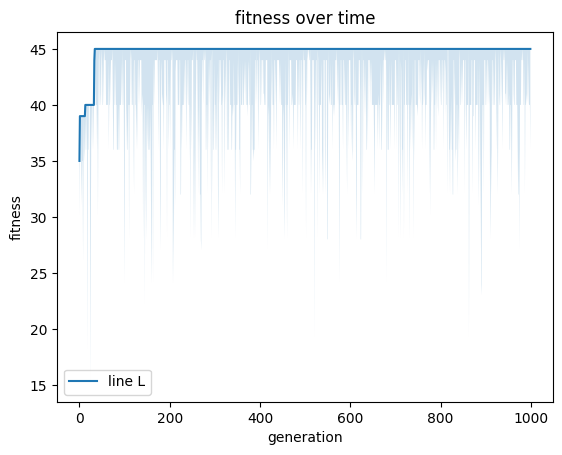

In [22]:
#plotting the evolution
x  = range(1000)
plt.plot(x, max_fitnesses, label="line L")
plt.fill_between(x, min_fitnesses, max_fitnesses, alpha=0.2)
plt.plot()

plt.xlabel("generation")
plt.ylabel("fitness")
plt.title("fitness over time")
plt.legend()
plt.show()

Finally, because the recipe is always sorted according to fitness, the fittest individual will be the one in the first position, so we can print this out.

In [23]:
pprint.PrettyPrinter().pprint(population[0])

{'Ingredients': [{'amount': 160,
                  'ingredient': 'white chocolate, broken into pieces',
                  'unit': 'g'},
                 {'amount': 92, 'ingredient': 'rich tea biscuit', 'unit': 'g'},
                 {'amount': 89, 'ingredient': 'double cream', 'unit': 'g'},
                 {'amount': 163, 'ingredient': 'mini marshmallow', 'unit': 'g'},
                 {'amount': 61, 'ingredient': 'pretzels, halved', 'unit': 'g'},
                 {'amount': 161, 'ingredient': 'cakecrumbs', 'unit': 'g'},
                 {'amount': 117, 'ingredient': 'white Malteser', 'unit': 'g'},
                 {'amount': 33, 'ingredient': 'dried cranberries', 'unit': 'g'},
                 {'amount': 74,
                  'ingredient': 'pitted Morello cherry, drained',
                  'unit': 'g'},
                 {'amount': 44, 'ingredient': 'icing sugar', 'unit': 'g'}],
 'fitness': 45,
 'name': 'recipe 104'}
